# Linear Regression with one variable
-----

## Theory

In this version of regression analysis there's only a single independent ($x$) and a single dependent ($y$) variable. It is assumed that their relationship can be modeled by: 

$$\begin{eqnarray}
y = xm+b \\
\tag{1}
\end{eqnarray}$$

The goal of the analysis is to determine the two unknown parameters $m$ and $b$. The resulting equation represents the estimated relationship between $x$ and $y$. To determine the parameters two pieces are necessary. First is a way to rate the resulting model to determine whether the model represents the given data or not. Second is a procedure to actually calculate the parameters based on the given data. Therefore a *cost function* will be defined to rate the model. As for determining the parameters the *gradient descent* algorithm will be used.

#### Cost Function

The following equation can be used to evaluate how good the model represents the given data: 

$$\begin{eqnarray}
J(m',b') = \frac{1}{2N} \sum_{i=1}^N(y_i' - y_i)^2 &&& \text{with} &&& y_i' = x_im'+b'
\tag{2}
\end{eqnarray}$$

The *error* of the model is determined by calculating the estimated $y$ which is represented by $y'$ (this uses the calculated $m'$ and $b'$) and then substracting the actual value $y$ from it. This results in the *error* of a single piece of data. The error can vary in between the data so the mean over the given $N$ data pieces is calculated. This function $J$ is called the *cost function*.

#### Gradient Descent

Before introducing the algorithm, a different representation of the model given in (1) will be chosen, a vectorized representation:

$$\begin{eqnarray}
y = (\vec{x})^T \theta &&&
\text{with} &&&
\vec{x} = \begin{bmatrix} x \\ 1 \end{bmatrix} &&&
\text{and} &&&
\theta =  \begin{bmatrix} m \\ b \end{bmatrix} &&&
\tag{3}
\end{eqnarray}$$

This will simplify the representation of the equations in the algorithm ($J(m',b')$ will become $J(\theta)$).

The purpose of this algorithm is to iteratively find the minimum of a function by adjusting the parameters ($\theta$) depending on their partial derivative:

$$\begin{eqnarray}
\theta^{t+1} = \theta^t - \alpha \frac{\partial}{\partial \theta_j} J(\theta^t) &&& \text{for every} & j
\tag{4}
\end{eqnarray}$$

$t$ denotes the result parameters after $t$ iterations. $\theta^0$ is a random initialization at the start of the algorithm while $\theta^1$ contains the adjusted values after the first iteration. $j$ denotes the index of the parameter in theta ( E.g. $\theta_0$ is $m$).

The partial derivative looks intimidating but because of the simplistic nature of linear regression with one variable the derivative for each $\theta_j$ can be calculated beforehand. The result looks a lot simpler:

$$\begin{eqnarray}
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{N} \sum_{i=1}^N (y_i' - y_i) x_i
\tag{5}
\end{eqnarray}$$

$$\begin{eqnarray}
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{N} \sum_{i=1}^N (y_i' - y_i) 
\tag{6}
\end{eqnarray}$$

Basically the partial derivative is just the cost $J$ multiplied by the corresponding input value ($\theta_0$ corresponds to $x$ and $\theta_1$ to $1$). 

(4), (5) and (6) combined can be written in a vectorized form:

$$\begin{eqnarray}
\theta^{t+1} = \theta^t - \frac{\alpha}{N} X^T (X \theta - \vec{y}) 
\tag{7}
\end{eqnarray}$$

The vector $y$ contains the values for every of the $N$ data pieces. $\theta$ consists of the estimated parameters. $X$ is now a matrix. The row $j$ is actually the transposed $\vec{x}$ (see (3)) of the $j$-th data piece. Each row is a distinct data piece. E.g. for 4 data pieces $X$ would look like this:

$$\begin{eqnarray}
X =  \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ x_3 & 1 \end{bmatrix}
\end{eqnarray}$$

The equation in (7) should be executed until $\theta$ converges.

-----

## The Implementation

In [1]:
import numpy as np


def compute_costs(x, y, theta):
    """ Calculates the squared error between ground truth y and predicted output y'

    :param x: input data samples x feature matrix
    :param y: output data or ground truth
    :param theta: the estimated linear regression parameters
    :return predicted_result: squared error
    """
    N = y.shape[0] # number of samples
    return 1/(2 * N) * sum(np.power(np.matmul(x, theta) - y, 2)) # vectorized form of (2)

def gradient_descent(x, y, theta=None, alpha=0.01, num_iters=100):
    """ Performs gradient descent to determine the best possible model based on given input data (x)
        output data (y)

    :param x: input data samples x feature matrix
    :param y: output data or ground truth
    :param theta: initial linear regression parameters
    :param alpha: learning rate
    :param num_iters: number of iterations to run gradient descent
    :return theta: learned linear regression parameters (parameters of the linear model)
    :return costs: list containing the calculated cost values for each step of gradient descent
    """
    m, n = x.shape
    if theta is None:
        theta = np.random.rand(n, 1)

    costs = []
    for i in range(num_iters):
        theta -= alpha * (1 / m) * np.matmul(np.transpose(x), (np.matmul(x, theta) - y)) # see (7)
        costs.append(compute_costs(x, y, theta))

    return theta, costs

def predict(x, theta):
    """ Predicts outputs based on input samples/features given theta

    :param x: input data samples x feature matrix
    :param theta: linear regression parameters learned
    :return predicted_result: predicted output for given input data
    """
    return np.matmul(x, theta)

## The Data

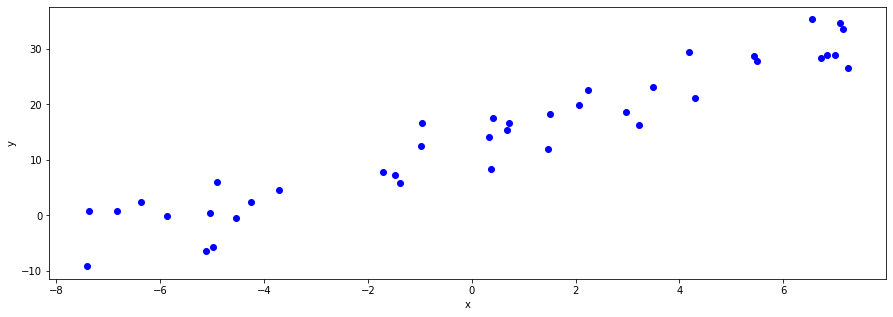

In [2]:
def generate_data(x):
    noise = np.random.random_sample((x.shape[0],1)) * 15 - 7.5
    return 2.5 * x + 13 + noise # basically y = mx + b with some noise added

# Generate data
np.random.seed(4)
x = np.random.random_sample((40,1)) * 15 - 7.5
y = generate_data(x)

# Add ones for gradient descent algorithm
x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)

# Plot data points
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1, figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x[:,0], y, "bo")
plt.show()

## Regression Analysis

[[ 2.49405108]
 [13.37652575]]


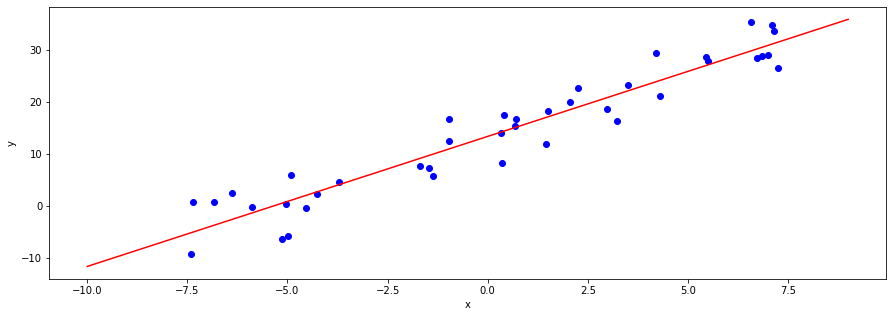

In [3]:
# Execute gradient descent
theta, costs = gradient_descent(x, y, alpha=0.05, num_iters=1000)
print(theta)

# Plot the data and the function/line resulting from the estimated parameters
plt.figure(1, figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x[:,0], y, "bo") # data

# create data to present the estimated model
x_ = np.arange(-10,10).reshape(-1, 1)
x_ = np.concatenate((x_, np.ones((x_.shape[0], 1))), axis=1)

plt.plot(x_[:,0], predict(x_, theta), "r-")
plt.show()

The values for $m = 2.494$ and $b = 13.377$ are pretty close to the original function's parameters. Overall, it looks like the model fits the data points.